## 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1,1)   #接下来的代码要区分好X和x

In [3]:
y = 0.5 * x**2 +x +2 + np.random.normal(0,1,size=100)

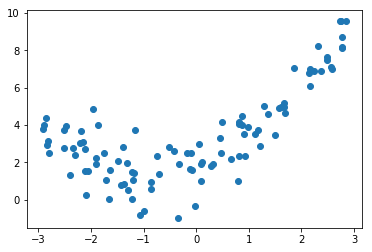

In [4]:
plt.scatter(x, y)

### 先利用线性回归

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

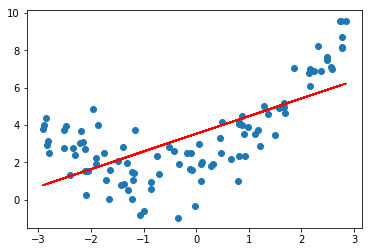

In [7]:
plt.scatter(x, y)
plt.plot(X, y_predict, color='r')

### 通过添加特征（将非线性项转化为线性特征项），解决非线性问题

In [8]:
(X**2).shape

(100, 1)

In [9]:
X2 = np.hstack([X, X**2])

In [10]:
X2.shape

(100, 2)

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_predict2 = lin_reg2.predict(X2)

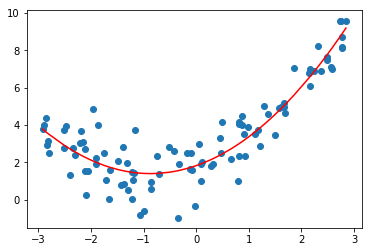

In [13]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')  #plt.scatter(x, y_predict2)

In [14]:
# x, x^2 的系数
lin_reg2.coef_

array([0.97948484, 0.56450351])

In [15]:
lin_reg2.intercept_

1.8305342454504407

## scikit-learn中的多项式回归和Pipeline

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 +x +2 + np.random.normal(0,1,size=100)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# degree表示添加最高次项的幂
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X3 = poly.transform(X) 

In [20]:
X3.shape

(100, 3)

In [21]:
# X^0  X^1  X^2
X3[:5, :]

array([[ 1.00000000e+00, -6.45353502e-02,  4.16481142e-03],
       [ 1.00000000e+00, -2.33851738e+00,  5.46866355e+00],
       [ 1.00000000e+00, -1.11937553e-01,  1.25300158e-02],
       [ 1.00000000e+00,  1.31821428e+00,  1.73768888e+00],
       [ 1.00000000e+00, -2.64429881e+00,  6.99231622e+00]])

In [22]:
X[:5, :]

array([[-0.06453535],
       [-2.33851738],
       [-0.11193755],
       [ 1.31821428],
       [-2.64429881]])

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg3 = LinearRegression()
lin_reg3.fit(X3, y)
y_predict3 = lin_reg3.predict(X3)

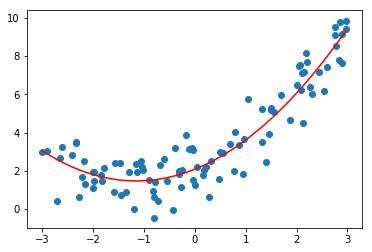

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict3[np.argsort(x)], color='r')  

In [25]:
lin_reg3.coef_

array([0.        , 1.06476539, 0.46095772])

In [26]:
lin_reg3.intercept_

2.090332479178264

### 关于PolynomialFeatures

In [27]:
X = np.arange(1, 11).reshape(-1 ,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [28]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [29]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### 使用Pipeline创建流水线

In [33]:
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 +x +2 + np.random.normal(0,1,size=100)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [36]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [37]:
y_predict = poly_reg.predict(X)

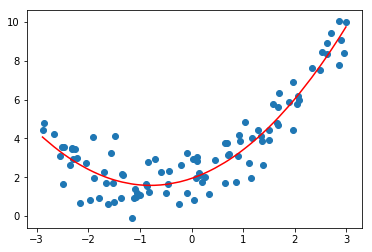

In [38]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')  